# Pasme psov

## Analiza podatkov s pandas

### Naložimo pandas in podatke

In [98]:
import pandas as pd
import os.path

#naj se izpiše le 10 vrstic
pd.options.display.max_rows = 10

# interaktivni notebook stil risanja
%matplotlib notebook
%matplotlib inline

# razpredelnica, s katero bomo delali
pot_do_csv = os.path.join("kuzki", "tabela.csv")
kuziji = pd.read_csv(pot_do_csv)

Poglejmo naše podatke.

In [2]:
kuziji

,name,breed_group,adaptability,friendliness,health_and_needs,trainability,physical_needs,height_od,height_do,weight_od,weight_do,life_od,life_do
0,afador,Mixed Breed Dogs,2,3,3,4,4,50.0,73.0,22.0,34.0,10,12
1,affenhuahua,Mixed Breed Dogs,3,3,3,3,3,15.0,30.0,1.0,5.0,13,18
2,affenpinscher,Companion Dogs,3,3,2,3,4,22.0,27.0,3.0,4.0,12,14
3,afghan-hound,Hound Dogs,4,4,2,3,4,60.0,66.0,22.0,27.0,10,12
4,airedale-terrier,Terrier Dogs,2,4,3,5,5,53.0,58.0,18.0,29.0,10,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,whoodle,Mixed Breed Dogs,3,4,3,2,4,30.0,50.0,9.0,20.0,12,15
377,wirehaired-pointing-griffon,Sporting Dogs,3,5,3,4,4,50.0,60.0,22.0,27.0,10,14
378,xoloitzuintli,Companion Dogs,3,3,3,4,3,NaN,NaN,4.0,22.0,14,20
379,yorkipoo,Hybrid Dogs,4,4,2,4,4,17.0,38.0,1.0,6.0,10,15


### Preučevanje podatkov

za začetek si poglejmo razpored po grupah.

In [3]:
kuziji_po_skupinah = kuziji.groupby("breed_group")

In [4]:
kuziji_po_skupinah.count()

,name,adaptability,friendliness,health_and_needs,trainability,physical_needs,height_od,height_do,weight_od,weight_do,life_od,life_do
breed_group,,,,,,,,,,,,
Companion Dogs,43,43,43,43,43,43,41,41,43,43,43,43
Herding Dogs,38,38,38,38,38,38,35,35,37,37,38,38
Hound Dogs,41,41,41,41,41,41,40,40,38,38,41,41
Hybrid Dogs,14,14,14,14,14,14,14,14,14,14,14,14
Mixed Breed Dogs,123,123,123,123,123,123,122,122,122,122,123,123
Sporting Dogs,40,40,40,40,40,40,21,21,40,40,40,40
Terrier Dogs,31,31,31,31,31,31,31,31,30,30,31,31
Working Dogs,51,51,51,51,51,51,40,40,51,51,51,51


In [5]:
kuziji_po_skupinah.mean()

,adaptability,friendliness,health_and_needs,trainability,physical_needs,height_od,height_do,weight_od,weight_do,life_od,life_do
breed_group,,,,,,,,,,,
Companion Dogs,3.255814,3.976744,2.697674,3.255814,3.651163,27.463415,35.317073,6.302326,10.860465,11.674419,14.930233
Herding Dogs,3.210526,3.894737,2.947368,3.552632,4.236842,44.342857,52.857143,17.135135,25.702703,11.342105,14.105263
Hound Dogs,3.000000,4.268293,3.195122,3.707317,4.073171,48.525000,58.225000,18.552632,28.894737,10.926829,13.512195
Hybrid Dogs,3.500000,4.214286,2.785714,3.214286,3.785714,38.142857,52.428571,13.500000,28.071429,10.714286,14.500000
Mixed Breed Dogs,3.000000,3.853659,3.097561,3.333333,4.008130,34.614754,50.122951,13.418033,25.778689,10.780488,14.341463
Sporting Dogs,3.100000,4.275000,3.075000,3.775000,4.375000,49.095238,57.714286,19.425000,27.950000,10.900000,13.775000
Terrier Dogs,3.193548,4.161290,2.806452,3.645161,4.322581,32.129032,36.451613,8.266667,12.666667,11.709677,14.935484
Working Dogs,2.745098,3.607843,3.392157,3.254902,3.823529,55.175000,68.225000,31.450980,51.156863,9.960784,12.784314


Na prvi pogled povprečne ocene za prvih pet stolpcev izgledajo zelo podobno. Do večjih razlik pride pri višini, teži in življenski dobi. Ker imamo za vsako od teh dva stolpca, ju združimo v enega.

In [89]:
skupine_brez_ocen = kuziji_po_skupinah[['name', 'breed_group', 'height_od','height_do','weight_od', 'weight_do','life_od','life_do']].mean().copy()

In [95]:
def sredina(niz1, niz2):
    cifra = (skupine_brez_ocen[niz1] + skupine_brez_ocen[niz2]) / 2
    return round(cifra, 2)

In [96]:
skupine_brez_ocen['višina'] = sredina('height_od', 'height_do')
skupine_brez_ocen['masa'] = sredina('weight_od', 'weight_do')
skupine_brez_ocen['življenska_doba'] = sredina('life_od', 'life_do')
skupine_brez_ocen

,height_od,height_do,weight_od,weight_do,life_od,life_do,višina,masa,življenska_doba
breed_group,,,,,,,,,
Companion Dogs,27.463415,35.317073,6.302326,10.860465,11.674419,14.930233,31.39,8.58,13.30
Herding Dogs,44.342857,52.857143,17.135135,25.702703,11.342105,14.105263,48.60,21.42,12.72
Hound Dogs,48.525000,58.225000,18.552632,28.894737,10.926829,13.512195,53.38,23.72,12.22
Hybrid Dogs,38.142857,52.428571,13.500000,28.071429,10.714286,14.500000,45.29,20.79,12.61
Mixed Breed Dogs,34.614754,50.122951,13.418033,25.778689,10.780488,14.341463,42.37,19.60,12.56
Sporting Dogs,49.095238,57.714286,19.425000,27.950000,10.900000,13.775000,53.40,23.69,12.34
Terrier Dogs,32.129032,36.451613,8.266667,12.666667,11.709677,14.935484,34.29,10.47,13.32
Working Dogs,55.175000,68.225000,31.450980,51.156863,9.960784,12.784314,61.70,41.30,11.37


Ta tabela ni preveč pregledna. Poglejmo raje te podatke s stolpičnimi diagrami.

<AxesSubplot:xlabel='breed_group'>

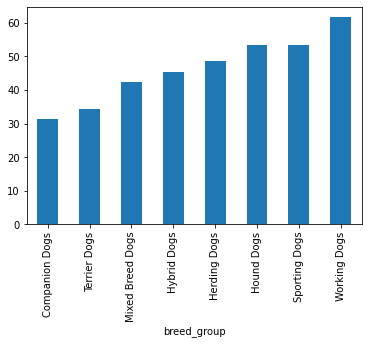

In [100]:
skupine_brez_ocen['višina'].sort_values(ascending=True).plot.bar()

<AxesSubplot:xlabel='breed_group'>

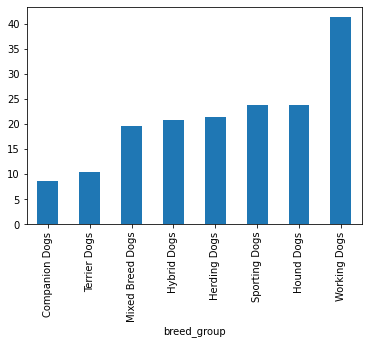

In [101]:
skupine_brez_ocen['masa'].sort_values(ascending=True).plot.bar()

<AxesSubplot:xlabel='breed_group'>

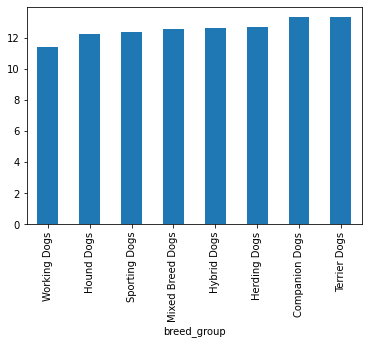

In [102]:
skupine_brez_ocen['življenska_doba'].sort_values(ascending=True).plot.bar()

Ugotovili smo, da se poprečna življenska doba na skupino med sabo ne razlikujejo kaj dosti. Če še enkrat pogledamo prvo tabelo, opazimo,da je tudi nekaj psov, ki dosežejo starost tudi do 20 let, čeprav je povprečje na njegovo skupino precej nižje. Do večjih razlik pride pri primerjavi višin in tež. Najbolj izstopajo working dogs, ki so kar veliko večji in tudi veliko težji kot ostali. Zanimivo pa je, da dosežejo najnižjo starost. Poleg tega opazimo tudi, da je vrstni red od najmanjšega do največjega enak vrstnemu redu od najlažjega do najtežjega. To nas ne bi smelo posebej presenečati, saj so manjši psi tudi lažji. Vrstni red za starost pa je bolj pomešan

In [83]:
kuziji.plot.scatter("life_do", "health_and_needs")
#to bols da spremenim

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='life_do', ylabel='health_and_needs'>

Vidimo, da je najvišja dosežena starost 20. Poglejmo katera vrsta je to.

In [7]:
kuziji[(kuziji["life_do"] == 20)]

,name,breed_group,adaptability,friendliness,health_and_needs,trainability,physical_needs,height_od,height_do,weight_od,weight_do,life_od,life_do
119,chi-chi,Mixed Breed Dogs,3,3,3,3,4,12.0,30.0,1.0,4.0,11,20
342,silken-windhound,Hound Dogs,4,4,3,4,4,45.0,45.0,9.0,24.0,14,20
378,xoloitzuintli,Companion Dogs,3,3,3,4,3,NaN,NaN,4.0,22.0,14,20


In [8]:
#analiza

## Poglejmo višino

In [9]:
kuziji.sort_values(['height_do', 'height_od'], ascending=[False, False])

,name,breed_group,adaptability,friendliness,health_and_needs,trainability,physical_needs,height_od,height_do,weight_od,weight_do,life_od,life_do
265,mastador,Mixed Breed Dogs,3,4,4,3,4,71.0,91.0,38.0,72.0,10,12
226,irish-wolfhound,Hound Dogs,2,5,3,3,3,81.0,88.0,52.0,81.0,6,8
348,spanish-mastiff,Working Dogs,3,3,3,2,3,66.0,88.0,63.0,99.0,10,12
5,akbash,Working Dogs,3,4,4,3,2,68.0,86.0,34.0,63.0,10,12
206,great-dane,Working Dogs,2,5,4,3,5,66.0,86.0,45.0,90.0,7,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,standard-schnauzer,Working Dogs,3,3,2,4,5,NaN,NaN,13.0,22.0,13,16
355,sussex-spaniel,Sporting Dogs,4,5,3,3,2,NaN,NaN,15.0,20.0,11,14
357,swedish-vallhund,Herding Dogs,3,4,4,3,5,NaN,NaN,9.0,15.0,12,15
361,tibetan-mastiff,Working Dogs,3,4,3,3,3,NaN,NaN,34.0,72.0,10,14


In [10]:
#ali je višina kaj odvisna od skupine, v kateri je

In [11]:
kuziji[kuziji['friendliness'] < 3]

,name,breed_group,adaptability,friendliness,health_and_needs,trainability,physical_needs,height_od,height_do,weight_od,weight_do,life_od,life_do
6,akita,Working Dogs,3,2,4,4,4,NaN,NaN,31.0,58.0,10,12
7,akita-chow,Mixed Breed Dogs,3,1,3,3,4,58.0,63.0,39.0,65.0,10,12
22,anatolian-shepherd-dog,Working Dogs,3,2,3,3,3,NaN,NaN,36.0,68.0,11,13
94,bull-pei,Mixed Breed Dogs,2,2,4,2,2,40.0,45.0,15.0,29.0,9,11
125,chinese-shar-pei,Working Dogs,3,2,3,3,2,45.0,50.0,18.0,24.0,8,12
131,chow-chow,Working Dogs,3,1,3,2,2,43.0,50.0,18.0,31.0,12,15
175,fila-brasileiro,Working Dogs,2,2,4,3,4,60.0,76.0,40.0,81.0,9,12
242,kooikerhondje,Sporting Dogs,3,2,3,3,5,35.0,40.0,9.0,11.0,12,14
243,kuvasz,Working Dogs,3,2,4,2,4,66.0,76.0,31.0,52.0,10,12


## Teža

In [12]:
kuziji.sort_values(['weight_do', 'weight_od'], ascending=[False, False])

,name,breed_group,adaptability,friendliness,health_and_needs,trainability,physical_needs,height_od,height_do,weight_od,weight_do,life_od,life_do
348,spanish-mastiff,Working Dogs,3,3,3,2,3,66.0,88.0,63.0,99.0,10,12
266,mastiff,Working Dogs,2,4,4,2,4,68.0,81.0,58.0,99.0,6,10
108,caucasian-shepherd-dog,Working Dogs,3,3,4,3,3,60.0,86.0,36.0,99.0,10,12
312,pyrenean-mastiff,Working Dogs,3,3,4,3,4,60.0,78.0,58.0,90.0,10,13
272,neapolitan-mastiff,Working Dogs,2,3,4,2,3,60.0,78.0,54.0,90.0,8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,mutt,Mixed Breed Dogs,3,3,3,3,3,NaN,NaN,NaN,NaN,8,15
277,norwegian-elkhound,Hound Dogs,4,4,3,4,4,48.0,50.0,NaN,NaN,12,15
281,old-english-sheepdog,Herding Dogs,4,4,3,3,4,53.0,53.0,NaN,NaN,10,12
282,otterhound,Hound Dogs,3,5,3,4,5,60.0,68.0,NaN,NaN,10,12


## Ali se prilagodljivost in učiljivost kako povezuje?

Zanima nas, če se tisti psi, ki se hitro prilagodijo tudi hitro naučijo in obratno. Zanima nas tudi za koliko se razlikujeta ti dve oceni povprecno pri vsakem.

In [78]:
nova = kuziji[['name', 'breed_group', 'adaptability','trainability']].copy()
adp_and_train = nova[abs(nova['adaptability'] - nova['trainability']) <= 1]
adp_and_train

,name,breed_group,adaptability,trainability
1,affenhuahua,Mixed Breed Dogs,3,3
2,affenpinscher,Companion Dogs,3,3
3,afghan-hound,Hound Dogs,4,3
5,akbash,Working Dogs,3,3
6,akita,Working Dogs,3,4
...,...,...,...,...
376,whoodle,Mixed Breed Dogs,3,2
377,wirehaired-pointing-griffon,Sporting Dogs,3,4
378,xoloitzuintli,Companion Dogs,3,4
379,yorkipoo,Hybrid Dogs,4,4


In [79]:
vseh = kuziji['name'].count().sum()
koliko = adp_and_train['name'].count().sum()
koliko * 100 / vseh

92.91338582677166

Izgleda, da se to dvoje res povezuje. Pri veliki večini lahko približno ocenimo, koliko bo imel učiljivost, če vemo za prilagodljivost in obratno. Kaj pa tisti, ki imajo to dvojr kar enako?

In [80]:
adp_and_train_1 = nova[abs(nova['adaptability'] - nova['trainability']) == 1]
adp_and_train_1['name'].count().sum() * 100 / vseh

48.031496062992126

Slaba polovica, kar je še vedno ogromno. Poglejmo, če sploh obstajajo taki, pri katerih je razlika teh dveh ocen 3 in več.

In [81]:
nova[abs(nova['adaptability'] - nova['trainability']) >= 3]

,name,breed_group,adaptability,trainability
4,airedale-terrier,Terrier Dogs,2,5
191,german-shorthaired-pointer,Sporting Dogs,2,5
294,pointer,Sporting Dogs,2,5


Izjem je tako malo, da jih lahko preštejemo na roke. Kar pa nas preseneti pa je, da imajo vse prilagodljivost 2 učiljivost pa 5.

## Ali so manjši psi res manj prijazni od ostalih?

Še mal opis bla bla.
Za majhne pse bomo imeli tiste, ki so približno tako veliki kot čivava. Zato si poglejmo do koliko zraste in odstranimo vse večje pse.

In [47]:
civava = kuziji[kuziji['name'] == 'chihuahua']
civava['height_do']

122    22.0
Name: height_do, dtype: float64

Čivava lahko torej zraste tudi do 22 cm. Za majhne pse razglasimo tiste, ki so manjsi od 25 cm.

In [14]:
izlocek = kuziji[['name', 'breed_group', 'friendliness','height_od', 'height_do']].copy()
majhni = izlocek[izlocek['height_do'] < 26]
majhni

,name,breed_group,friendliness,height_od,height_do
92,brussels-griffon,Companion Dogs,4,17.0,20.0
101,cairn-terrier,Terrier Dogs,5,22.0,25.0
104,cardigan-welsh-corgi,Herding Dogs,4,25.0,2.0
122,chihuahua,Companion Dogs,4,15.0,22.0
129,chiweenie,Mixed Breed Dogs,3,15.0,25.0
...,...,...,...,...,...
336,shih-tzu,Companion Dogs,5,22.0,25.0
343,silky-terrier,Companion Dogs,3,22.0,25.0
344,skye-terrier,Terrier Dogs,4,22.0,25.0
362,tibetan-spaniel,Companion Dogs,4,25.0,25.0


Za vsako oceno poglejmo procente.

In [15]:
majhni_po_prijaznosti = majhni.groupby('friendliness')
majhni_po_prijaznosti.size().sort_values(ascending=False)

friendliness
4    11
3     9
5     4
dtype: int64

In [16]:
#naredi iz teh podatkov graf plot.bar

Izkaže se, da nihče nima ocene za prijaznost manjše od 3. Še celo več je takih, ki imajo oceno kar 4. Zato naša domneva ni bila pravilna.

Poglejmo zdaj še tiste, ki imajo oceno manjšo od 3.

In [17]:
neprijazni = kuziji[kuziji['friendliness'] < 3]
neprijazni

,name,breed_group,adaptability,friendliness,health_and_needs,trainability,physical_needs,height_od,height_do,weight_od,weight_do,life_od,life_do
6,akita,Working Dogs,3,2,4,4,4,NaN,NaN,31.0,58.0,10,12
7,akita-chow,Mixed Breed Dogs,3,1,3,3,4,58.0,63.0,39.0,65.0,10,12
22,anatolian-shepherd-dog,Working Dogs,3,2,3,3,3,NaN,NaN,36.0,68.0,11,13
94,bull-pei,Mixed Breed Dogs,2,2,4,2,2,40.0,45.0,15.0,29.0,9,11
125,chinese-shar-pei,Working Dogs,3,2,3,3,2,45.0,50.0,18.0,24.0,8,12
131,chow-chow,Working Dogs,3,1,3,2,2,43.0,50.0,18.0,31.0,12,15
175,fila-brasileiro,Working Dogs,2,2,4,3,4,60.0,76.0,40.0,81.0,9,12
242,kooikerhondje,Sporting Dogs,3,2,3,3,5,35.0,40.0,9.0,11.0,12,14
243,kuvasz,Working Dogs,3,2,4,2,4,66.0,76.0,31.0,52.0,10,12


Iz tabele preberemo, da je takih zelo malo. Le dva pa imata oceno 1.

Kolikšen procent vseh je to?

In [18]:
vseh = kuziji['name'].count().sum()
st_neprijaznih = neprijazni['name'].count().sum()
st_neprijaznih * 100 / vseh

2.3622047244094486

Komaj 2%. Pa napiši še kej zravn.

## Življenje... strarost

In [19]:
kuziji.sort_values(['life_do', 'life_od'], ascending=[False, False])

,name,breed_group,adaptability,friendliness,health_and_needs,trainability,physical_needs,height_od,height_do,weight_od,weight_do,life_od,life_do
342,silken-windhound,Hound Dogs,4,4,3,4,4,45.0,45.0,9.0,24.0,14,20
378,xoloitzuintli,Companion Dogs,3,3,3,4,3,NaN,NaN,4.0,22.0,14,20
119,chi-chi,Mixed Breed Dogs,3,3,3,3,4,12.0,30.0,1.0,4.0,11,20
1,affenhuahua,Mixed Breed Dogs,3,3,3,3,3,15.0,30.0,1.0,5.0,13,18
229,jack-chi,Mixed Breed Dogs,3,4,3,3,4,30.0,38.0,3.0,8.0,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,great-dane,Working Dogs,2,5,4,3,5,66.0,86.0,45.0,90.0,7,10
55,bernese-mountain-dog,Working Dogs,2,5,4,4,4,58.0,71.0,31.0,52.0,6,10
266,mastiff,Working Dogs,2,4,4,2,4,68.0,81.0,58.0,99.0,6,10
208,greater-swiss-mountain-dog,Working Dogs,3,5,3,3,4,58.0,71.0,38.0,63.0,7,9


Ali lahko življensko dobo psa prb ocenimo že, če vemo kateri skupini pripada?

In [20]:
#najprej tabela brez ostalih podatkov ki jih ne bomo potrebovali

In [21]:
kuziji_life = kuziji[['name', 'breed_group', 'life_od', 'life_do']].copy()
kuziji_life.sort_values(['life_do', 'life_od'], ascending=[False, False])

,name,breed_group,life_od,life_do
342,silken-windhound,Hound Dogs,14,20
378,xoloitzuintli,Companion Dogs,14,20
119,chi-chi,Mixed Breed Dogs,11,20
1,affenhuahua,Mixed Breed Dogs,13,18
229,jack-chi,Mixed Breed Dogs,13,18
...,...,...,...,...
206,great-dane,Working Dogs,7,10
55,bernese-mountain-dog,Working Dogs,6,10
266,mastiff,Working Dogs,6,10
208,greater-swiss-mountain-dog,Working Dogs,7,9


Poglejmo povrečje za vsako skupino.

In [22]:
t = kuziji_po_skupinah[['life_od', 'life_do']].mean().sort_values(['life_do', 'life_od'], ascending=[False, False])
t['life_povprecje'] = (t.life_od + t.life_do) /2
t

,life_od,life_do,life_povprecje
breed_group,,,
Terrier Dogs,11.709677,14.935484,13.322581
Companion Dogs,11.674419,14.930233,13.302326
Hybrid Dogs,10.714286,14.500000,12.607143
Mixed Breed Dogs,10.780488,14.341463,12.560976
Herding Dogs,11.342105,14.105263,12.723684
Sporting Dogs,10.900000,13.775000,12.337500
Hound Dogs,10.926829,13.512195,12.219512
Working Dogs,9.960784,12.784314,11.372549


Vidimo, da je pričakovana povprečna življenska doba na skupino dokaj nizka, čeprav nekateri psi lahko dosežejo starost tudi do dvajset let oz. 140 v pasjih letih. Podatki se med seboj skoraj ne razlikujejo. če gledamo povrečno starost glede na skupino, nam ta ne da dobrega odgovora. Do rahlega odstopanja pridejo le working dog. Poglejmo, če lahko napovemo vsaj zanje.

In [23]:
#najprej se povprecje med life od in do

In [24]:
kuziji[kuziji['breed_group'] == 'Working Dogs'].sort_values(['life_do', 'life_od'], ascending=[False, False])

,name,breed_group,adaptability,friendliness,health_and_needs,trainability,physical_needs,height_od,height_do,weight_od,weight_do,life_od,life_do
59,black-mouth-cur,Working Dogs,3,4,3,4,4,40.0,63.0,18.0,43.0,12,18
354,standard-schnauzer,Working Dogs,3,3,2,4,5,NaN,NaN,13.0,22.0,13,16
62,blue-lacy,Working Dogs,3,3,3,5,5,43.0,63.0,11.0,22.0,12,16
12,american-bulldog,Working Dogs,2,3,3,3,4,50.0,71.0,27.0,54.0,10,16
11,alaskan-malamute,Working Dogs,2,4,3,4,5,NaN,NaN,34.0,45.0,12,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,saint-bernard,Working Dogs,3,5,4,2,3,NaN,NaN,54.0,81.0,8,10
206,great-dane,Working Dogs,2,5,4,3,5,66.0,86.0,45.0,90.0,7,10
55,bernese-mountain-dog,Working Dogs,2,5,4,4,4,58.0,71.0,31.0,52.0,6,10
266,mastiff,Working Dogs,2,4,4,2,4,68.0,81.0,58.0,99.0,6,10


še vedno jih je kar nekaj, ki imajo life_do vecji od 12.
Poglejmo še koliko pa je dejansko takih za katere bi veljala ocena iz skupine.

In [25]:
#mogoce bi tuki namesto 13 in 9 dala raje priblizek iz tabele

In [26]:
kuziji[(kuziji['breed_group'] == 'Working Dogs') & (kuziji['life_do'] < 13) & (kuziji['life_od'] > 9)]

,name,breed_group,adaptability,friendliness,health_and_needs,trainability,physical_needs,height_od,height_do,weight_od,weight_do,life_od,life_do
5,akbash,Working Dogs,3,4,4,3,2,68.0,86.0,34.0,63.0,10,12
6,akita,Working Dogs,3,2,4,4,4,NaN,NaN,31.0,58.0,10,12
60,black-russian-terrier,Working Dogs,3,3,3,3,4,66.0,71.0,36.0,63.0,10,11
65,boerboel,Working Dogs,2,3,4,3,4,55.0,71.0,49.0,90.0,10,12
82,boxer,Working Dogs,3,4,3,3,5,53.0,63.0,27.0,31.0,10,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,komondor,Working Dogs,3,3,3,4,3,63.0,68.0,36.0,45.0,10,12
243,kuvasz,Working Dogs,3,2,4,2,4,66.0,76.0,31.0,52.0,10,12
257,leonberger,Working Dogs,2,4,4,3,4,63.0,78.0,54.0,77.0,10,12
278,norwegian-lundehund,Working Dogs,3,5,3,3,5,NaN,NaN,5.0,7.0,10,12


In [27]:
koliksen_delez = 14 * 100 / 51
koliksen_delez

27.45098039215686

In [28]:
#mogoce tut to bols ad z izracunanimi ciframi
# ali pa zajamem vecji range(tisti ki se razlikujejo za manj kot 1, manj kot 2...)

Le dobrih 27 % je takih, ki dejansko ustreza oceni povprečni oceni iz tabele.
Izkaže se, da starosti ne moremo napovedati, če vemo samo kateri skupini pripada.

## Za konec poglejmo katere pse se najbolj splača posvojiti?

Najprej bomo gledali pse, ki imajo vsaj tri ocene večje od 3. Nato pa še take, ki imajo vse ocene večje od 3. Pri tem izločimo physical need. (zakaj?)

In [44]:
# izločimo najprej nepotrebne stolpce
ocene = kuziji[['name', 'breed_group', 'adaptability', 'friendliness', 'health_and_needs', 'trainability', 'physical_needs']]

prva = ocene[(ocene['adaptability'] > 3) & (ocene['friendliness'] > 3) & ((ocene['health_and_needs'] > 3) | (ocene['trainability'] > 3))]
druga = ocene[((ocene['adaptability'] > 3) | (ocene['friendliness'] > 3)) & (ocene['health_and_needs'] > 3) & (ocene['trainability'] > 3)]

tabela_merge = pd.merge(prva, druga, how='outer')
tabela_merge

,name,breed_group,adaptability,friendliness,health_and_needs,trainability,physical_needs
0,american-eskimo-dog,Companion Dogs,4,5,3,4,4
1,australian-shepherd-lab-mix,Mixed Breed Dogs,4,4,4,4,5
2,basenji,Hound Dogs,4,5,2,4,3
3,bedlington-terrier,Terrier Dogs,4,5,3,4,4
4,belgian-sheepdog,Herding Dogs,4,5,3,4,5
...,...,...,...,...,...,...,...
49,rottador,Mixed Breed Dogs,3,4,4,4,5
50,rottweiler,Working Dogs,2,4,4,4,4
51,shiloh-shepherd,Working Dogs,3,5,4,4,4
52,treeing-walker-coonhound,Hound Dogs,3,4,4,4,4


Dobili smo kar velik nabor psičkov. Ali katera izmed skupin prevladuje?

In [51]:
tabela_merge.groupby('breed_group')["name"].count().sort_values(ascending=False)

breed_group
Mixed Breed Dogs    13
Hound Dogs          10
Sporting Dogs        9
Terrier Dogs         6
Herding Dogs         6
Working Dogs         5
Hybrid Dogs          3
Companion Dogs       2
Name: name, dtype: int64

Največ je torej mešancev. Razvrstimo jih še glede na potrebo po gibanju, da bi se novi lastnik lažje odločil.

In [42]:
tabela_merge.sort_values(by='physical_needs', ascending=False)

,name,breed_group,adaptability,friendliness,health_and_needs,trainability,physical_needs
27,welsh-springer-spaniel,Sporting Dogs,4,4,3,4,5
20,norwich-terrier,Terrier Dogs,4,5,3,4,5
49,rottador,Mixed Breed Dogs,3,4,4,4,5
47,labrador-retriever,Sporting Dogs,3,5,4,4,5
46,labrabull,Mixed Breed Dogs,3,4,4,4,5
...,...,...,...,...,...,...,...
12,cocker-spaniel,Sporting Dogs,4,4,3,4,3
23,pharaoh-hound,Hound Dogs,4,5,3,4,3
11,clumber-spaniel,Sporting Dogs,4,4,4,4,3
7,borzoi,Hound Dogs,4,4,4,4,2


Kaj pa tisti, ki imajo vse štiri ocene večje od 3.

In [38]:
#vse ocene vecje od 3
naj = ocene[(ocene['adaptability'] > 3) & (ocene['friendliness'] > 3) & (ocene['health_and_needs'] > 3) & (ocene['trainability'] > 3)]
naj.sort_values(by='physical_needs', ascending=False)

,name,breed_group,adaptability,friendliness,health_and_needs,trainability,physical_needs
32,australian-shepherd-lab-mix,Mixed Breed Dogs,4,4,4,4,5
136,clumber-spaniel,Sporting Dogs,4,4,4,4,3
74,borzoi,Hound Dogs,4,4,4,4,2


'Idealne' pasme so torej le tri. Za nekoga, ki se veliko giba, bi priporočili australian-shepherd-lab-mix. Za nekoga, ki bi rajši bolj umrjenega psa pa clumber-spaniel ali borzoi.